# Visualizing the Ford gobike system 

## 1- Gather data

#### Gathering data localy after downloading it from the website provided by udacity , I choose the Ford go bike sharing system files from the january until May of 2019 .

In [28]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
%matplotlib inline
import datetime
import time
import warnings
warnings.filterwarnings('ignore')

In [29]:
#Read data locally form monthe 1 to 5 of 2019 
data1 = pd.read_csv('201901-fordgobike-tripdata.csv')
data2 = pd.read_csv('201902-fordgobike-tripdata.csv')
data3 = pd.read_csv('201903-fordgobike-tripdata.csv')
data4 = pd.read_csv('201904-fordgobike-tripdata.csv')
data5 = pd.read_csv('201905-baywheels-tripdata.csv')

## 2- Assessing data

In [30]:
#explore dataset
data1.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.25646,4861,Subscriber,1989.0,Male,No


In [5]:
data2.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No


In [6]:
data3.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,53588,2019-03-31 20:59:21.8780,2019-04-01 11:52:30.2000,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,-122.453704,6803,Subscriber,1980.0,Other,No


In [7]:
data4.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.7883,-122.408531,2749,Subscriber,1989.0,Female,No


In [8]:
data5.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,48877,2019-05-31 20:34:56.8110,2019-06-01 10:09:34.7960,321.0,5th St at Folsom,37.780146,-122.403071,60.0,8th St at Ringold St,37.77452,-122.409449,1416,Customer,1990.0,Female,No


In [31]:
#combine all datasets in one
fordgobike_2019 = data1.append([data2,data3,data4,data5])
fordgobike_2019.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,1989.0,Male,No
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,1989.0,Male,No
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,1965.0,Female,No
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,1974.0,Male,No
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,NaN,NaN,No


In [32]:
fordgobike_2019.shape

(1053067, 16)

In [33]:
# View descriptive statistics of the dataframe
fordgobike_2019.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.053067e+06,1.052322e+06,1.053067e+06,1.053067e+06,1.052322e+06,1.053067e+06,1.053067e+06,1.053067e+06,1.003691e+06
mean,7.793630e+02,1.394330e+02,3.777006e+01,-1.223534e+02,1.378195e+02,3.776961e+01,-1.223510e+02,3.883042e+03,1.984671e+03
std,1.891006e+03,1.143622e+02,1.069203e-01,1.676838e-01,1.142789e+02,1.855866e-01,5.193068e-01,1.974972e+03,1.010330e+01
min,6.100000e+01,3.000000e+00,0.000000e+00,-1.224537e+02,3.000000e+00,0.000000e+00,-1.224537e+02,1.100000e+01,1.878000e+03
25%,3.400000e+02,4.400000e+01,3.777008e+01,-1.224130e+02,4.400000e+01,3.777041e+01,-1.224117e+02,2.165000e+03,1.980000e+03
50%,5.420000e+02,1.020000e+02,3.778076e+01,-1.223984e+02,1.000000e+02,3.778095e+01,-1.223983e+02,4.549000e+03,1.987000e+03
75%,8.480000e+02,2.390000e+02,3.779728e+01,-1.222912e+02,2.350000e+02,3.779728e+01,-1.222914e+02,5.428000e+03,1.992000e+03
max,8.611400e+04,4.270000e+02,3.788022e+01,0.000000e+00,4.270000e+02,3.788022e+01,0.000000e+00,7.196000e+03,2.001000e+03


In [34]:
#check duplicat
fordgobike_2019.duplicated().sum()

0

In [35]:
#check null values 
fordgobike_2019.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id             745
start_station_name           745
start_station_latitude         0
start_station_longitude        0
end_station_id               745
end_station_name             745
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          49376
member_gender              49370
bike_share_for_all_trip        0
dtype: int64

In [36]:
fordgobike_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1053067 entries, 0 to 182162
Data columns (total 16 columns):
duration_sec               1053067 non-null int64
start_time                 1053067 non-null object
end_time                   1053067 non-null object
start_station_id           1052322 non-null float64
start_station_name         1052322 non-null object
start_station_latitude     1053067 non-null float64
start_station_longitude    1053067 non-null float64
end_station_id             1052322 non-null float64
end_station_name           1052322 non-null object
end_station_latitude       1053067 non-null float64
end_station_longitude      1053067 non-null float64
bike_id                    1053067 non-null int64
user_type                  1053067 non-null object
member_birth_year          1003691 non-null float64
member_gender              1003697 non-null object
bike_share_for_all_trip    1053067 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 136.6+ MB


#### <bold>Assessment report</bold>

*Quality issues:
<li>-start_time ,end_time are objects should be timestamps.</li>
<li>-user type, member_gender and bike_share_for_all_trip should be category.</li>
<li>-start_station_id ,start_station_name ,end_station_id ,end_station_name member birth year and member_gender has null values .</li>
<li> -The age of the user more useful information than the year of birth .</li>
<li>- Convert duration to minute does not affect the analysis but make it clear for visualization.</li>


*Tidiness Issues:
<li>-Start_time contain lots of information should be in different columns. </li>

  


## 3-Data Cleaning¶


In [37]:
# Create copies of original DataFrames
fordgobike_2019_clean = fordgobike_2019.copy()

#### Define:
Set the timestamps and category data type 

#### Code:

In [38]:
# set dates to timestamps
fordgobike_2019_clean.start_time = pd.to_datetime(fordgobike_2019_clean.start_time)
fordgobike_2019_clean.end_time = pd.to_datetime(fordgobike_2019_clean.end_time)

In [39]:
# set user type, gender and bike_share_for_all_trip to category
fordgobike_2019_clean.user_type = fordgobike_2019_clean.user_type.astype('category')
fordgobike_2019_clean.member_gender = fordgobike_2019_clean.member_gender.astype('category')
fordgobike_2019_clean.bike_share_for_all_trip = fordgobike_2019_clean.bike_share_for_all_trip.astype('category')

In [40]:
#Test
fordgobike_2019_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1053067 entries, 0 to 182162
Data columns (total 16 columns):
duration_sec               1053067 non-null int64
start_time                 1053067 non-null datetime64[ns]
end_time                   1053067 non-null datetime64[ns]
start_station_id           1052322 non-null float64
start_station_name         1052322 non-null object
start_station_latitude     1053067 non-null float64
start_station_longitude    1053067 non-null float64
end_station_id             1052322 non-null float64
end_station_name           1052322 non-null object
end_station_latitude       1053067 non-null float64
end_station_longitude      1053067 non-null float64
bike_id                    1053067 non-null int64
user_type                  1053067 non-null category
member_birth_year          1003691 non-null float64
member_gender              1003697 non-null category
bike_share_for_all_trip    1053067 non-null category
dtypes: category(3), datetime64[ns](2), float

#### Define:
Drop data with nan value 

Code:

In [41]:
fordgobike_2019_clean = fordgobike_2019_clean.dropna(subset = ['member_gender','member_birth_year'])

In [42]:
#Test
fordgobike_2019_clean.isnull()[['member_birth_year', 'member_gender']].sum()


member_birth_year    0
member_gender        0
dtype: int64

#### Define:
Calculate the age of the members

Code:

In [43]:
fordgobike_2019_clean['member_age'] = 2019 -fordgobike_2019_clean['member_birth_year']

In [44]:
#Test
fordgobike_2019_clean.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.25646,4861,Subscriber,1989.0,Male,No,30.0


#### Define:
Extract month and hours from start_time and convert duration to minute.

Code:

In [45]:
fordgobike_2019_clean ['start_month']=fordgobike_2019_clean ['start_time'].dt.month
fordgobike_2019_clean ['start_hour']=fordgobike_2019_clean ['start_time'].dt.hour

In [46]:
#convert duration to minute
fordgobike_2019_clean['duration_min'] = fordgobike_2019_clean['duration_sec']/60
fordgobike_2019_clean['duration_min'] = fordgobike_2019_clean['duration_min'].astype(int)

In [47]:
#Test
fordgobike_2019_clean.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_month,start_hour,duration_min
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.25646,4861,Subscriber,1989.0,Male,No,30.0,1,17,1347


# Analysis and visualisation

## Univariate data exploration 

#### In this section,I will investigate distributions of individual variables like :


   <li> -The percentages of the user type using the system .</li>
   <li> -percentages of female and male using the system.</li>
   <li> -the riders maximum and minimum age .</li>
    <li> -Top 10 stations .</li>
     <li> -The mean of trip duration in min minute .</li>




### -What are the percentages of the user type for the Ford Go Bike sharing system?

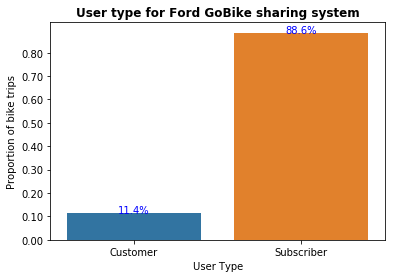

In [38]:
#order=fordgobike_2019_clean.user_type.value_counts().index
chart=sb.countplot(data = fordgobike_2019_clean , x = 'user_type');
labels = ['Customer', 'Subscriber']
plt.title('User type for Ford GoBike sharing system',fontsize=12, fontweight='bold');
# get proportion taken by most common group for derivation
# of tick marks
n_points = fordgobike_2019_clean.shape[0]
max_count = fordgobike_2019_clean['user_type'].value_counts().max()
max_prop = max_count / n_points
# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.10);
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = fordgobike_2019_clean, x = 'user_type')
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('Proportion of bike trips');
plt.xlabel('User Type');

# add annotations
n_points = fordgobike_2019_clean.shape[0]
counts = fordgobike_2019_clean['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'B')

#### The bike sharing system is mainly used by subscribers with 88.6% . 

### -What are the percentages of female and male using the Ford Go Bike sharing system?

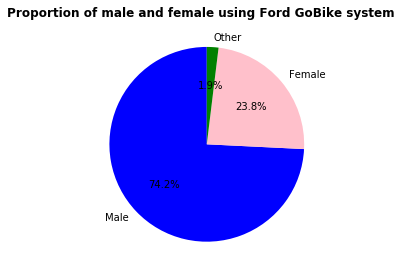

In [39]:
sorted_counts = fordgobike_2019_clean['member_gender'].value_counts()
colors = ['blue', 'pink','green']
plt.pie(sorted_counts, labels=sorted_counts.index, colors = colors,autopct='%1.1f%%', startangle=90)
plt.axis('square')
plt.suptitle('Proportion of male and female using Ford GoBike system', fontsize=12, fontweight='bold');

#### Male use the sharing bike system more than females by 74.2%

### -What are the maximum and minimum age using the Ford Go Bike sharing system?

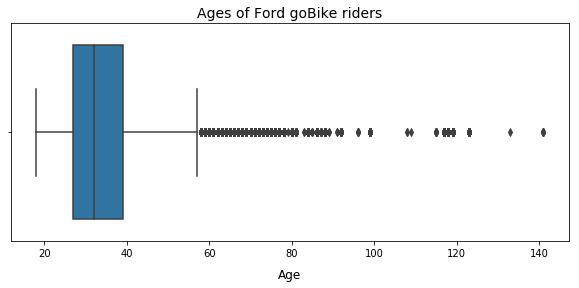

In [40]:
plt.figure(figsize = [10, 4])
sns.boxplot(data= fordgobike_2019_clean, x='member_age');
plt.title("Ages of Ford goBike riders", fontsize=14)
plt.xlabel("Age", fontsize=12, labelpad=10);

In [41]:
fordgobike_2019_clean['member_age'].describe()

count    1.003691e+06
mean     3.432885e+01
std      1.010330e+01
min      1.800000e+01
25%      2.700000e+01
50%      3.200000e+01
75%      3.900000e+01
max      1.410000e+02
Name: member_age, dtype: float64

#### The ages are between 18- 141 and the mean 32 ,the boxplot shows outliers above 100 which I think related to old membership  




### -What is th mean trip duration?

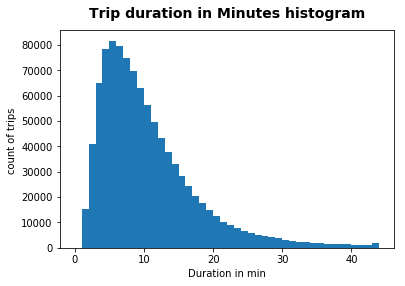

In [63]:
bin_edges = np.arange(0, 45, 1)
plt.hist(data = fordgobike_2019_clean, x = 'duration_min', bins = bin_edges)
plt.title("Trip duration in Minutes histogram", y=1.03, fontsize=14, fontweight='semibold')
plt.xlabel('Duration in min')
plt.ylabel('count of trips ');

In [59]:
fordgobike_2019_clean['duration_min'].mean()

11.975429689017835

#### From the histogram above most trip durations are less than 30min and usually last for 12 min.

### -What are the top 10 station ?

In [46]:
count_name= fordgobike_2019_clean.start_station_name.value_counts().head(10)
count_name

San Francisco Caltrain Station 2  (Townsend St at 4th St)    20218
Market St at 10th St                                         19589
Berry St at 4th St                                           16232
San Francisco Ferry Building (Harry Bridges Plaza)           16105
Montgomery St BART Station (Market St at 2nd St)             15354
Powell St BART Station (Market St at 4th St)                 14989
San Francisco Caltrain (Townsend St at 4th St)               14440
Steuart St at Market St                                      13320
Powell St BART Station (Market St at 5th St)                 13310
Howard St at Beale St                                        12493
Name: start_station_name, dtype: int64

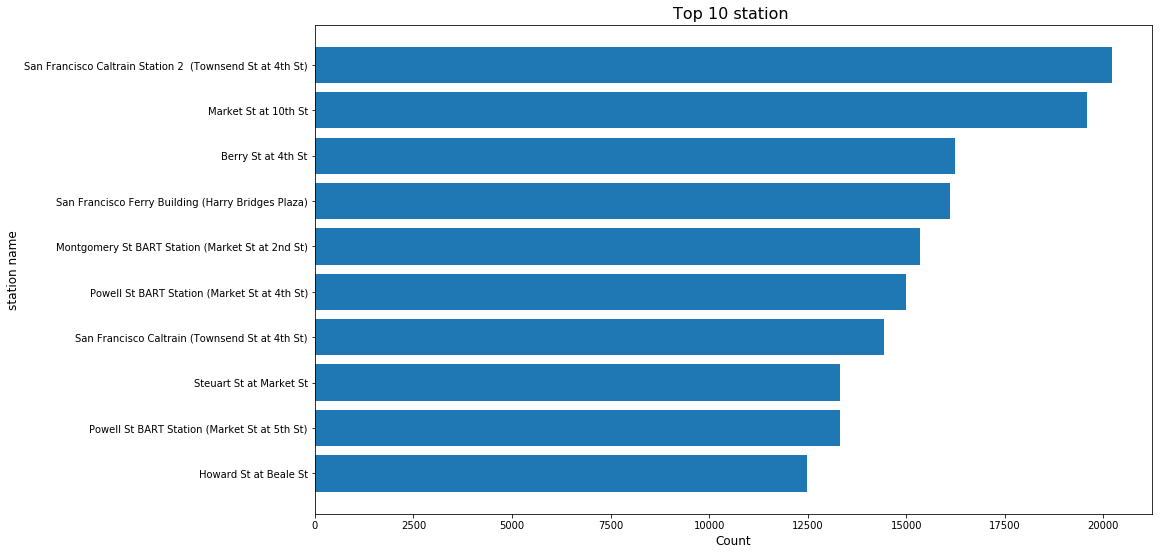

In [48]:
plt.figure(figsize=(15,9))
plt.barh(count_name.index , count_name)
plt.xlabel('Count', fontsize = 12)
plt.ylabel('station name', fontsize = 12)
plt.title('Top 10 station ',fontsize = 16)
plt.gca().invert_yaxis()
plt.show();



#### The most popular station is San Francisco Caltrain Station 2(Townsend St at 4th St)  

# Bivariate data exploration

#### I will look at the relations between two variables.
<li>-User age rang for each gender .</li>
<li>-Average trip for each user type .</li>
<li>-Monthly usage of the system per user type.</li>
<li>-Hourly usage of the system per user type.</li>

### -What are the age rang for each gender ?

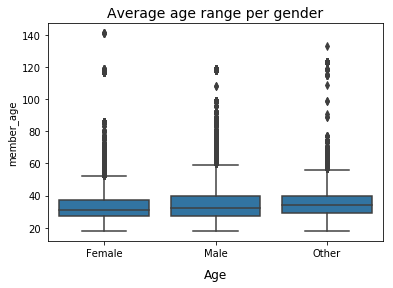

In [142]:
sb.boxplot(data =fordgobike_2019_clean, x = 'member_gender', y = 'member_age', color = base_color);
plt.title("Average age range per gender", fontsize=14)
plt.xlabel("Age", fontsize=12, labelpad=10);

#### From the boxplot we can see that most of the riders are male between the age 20-40 

### -What is the averag trip durtion for each user type ?

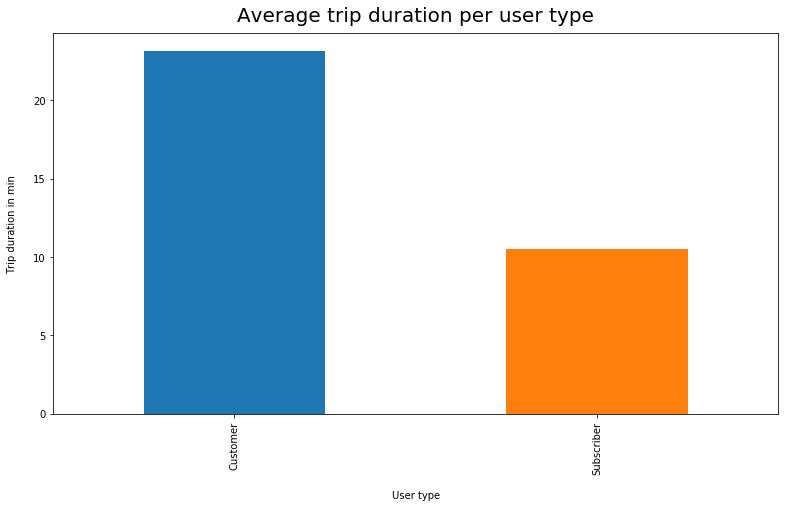

In [143]:
ax = fordgobike_2019_clean.groupby('user_type')['duration_min'].mean().plot(kind='bar', figsize=(13,7))
ax.set_title('Average trip duration per user type', fontsize=20, y=1.015)
ax.set_ylabel('Trip duration in min', labelpad=16)
ax.set_xlabel('User type', labelpad=16);

#### From the bar chart , we see that the average duration time is more than 20 sec for customers and less than 15 for subscriber.

## -What are the usage of the Ford gobike sytem per user type in each month?

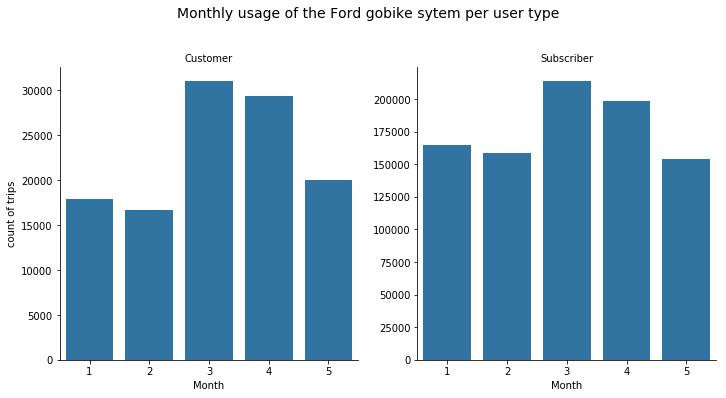

In [146]:
g = sns.catplot(data=fordgobike_2019_clean, x='start_month', col="user_type", kind='count',sharey = False ,color = base_color)
g.set_axis_labels("Month", "count of trips")
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of the Ford gobike sytem per user type ',y=1.10 ,fontsize=14);



#### The bar chart shows that the most bike riders are in march for both user type .

## -What are the usage of the Ford gobike sytem per user type in hour ?

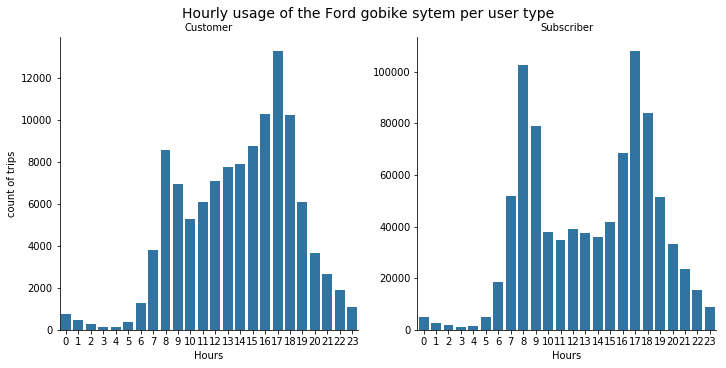

In [144]:
g = sns.catplot(data=fordgobike_2019_clean, x='start_hour', col="user_type", kind='count',sharey = False ,color = base_color)
g.set_axis_labels("Hours", "count of trips")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the Ford gobike sytem per user type ',y=1.10 ,fontsize=14);

#### The chart shows that the peak hour for customers are around 5 pm and subscribers between 8am and 5pm

# Multivariate data exploration

#### I will investigate three variables to get a closer result about the system , take the behave of different genders for each user type with different variables.

### -Which gender and user type are the most used of the Ford gobike system ?

In [77]:
order =fordgobike_2019_clean.user_type.value_counts().index

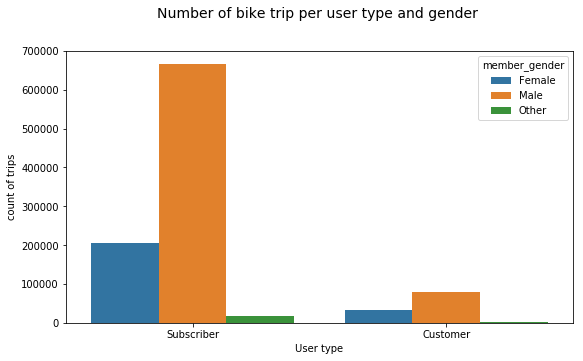

In [166]:
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1)
g = sns.countplot(data= fordgobike_2019_clean , x="user_type", hue="member_gender", order=order)
g.set_xlabel('User type')
g.set_ylabel('count of trips');
g.set_title('Number of bike trip per user type and gender ',y=1.10 ,fontsize=14);


#### From the chart we see that subscriber males are using the ford go bike system more than the other genders .




### -Which month used often by the user type and  gender ?

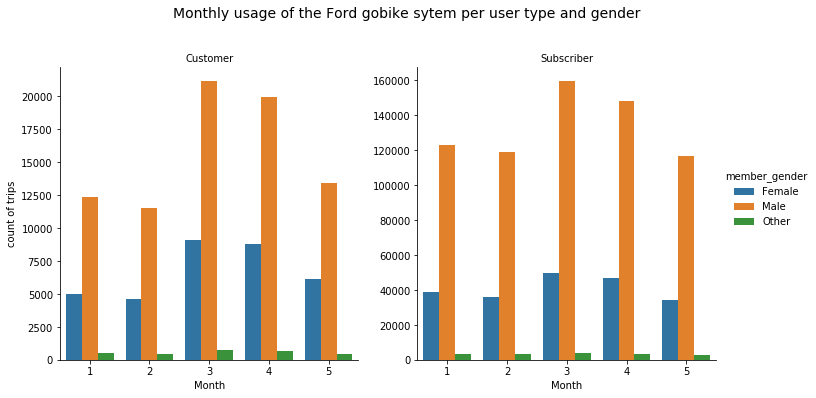

In [147]:
g = sns.catplot(data=fordgobike_2019_clean, x='start_month', col="user_type", hue="member_gender" , kind='count' ,sharey = False )
g.set_axis_labels('Month', 'count of trips')
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of the Ford gobike sytem per user type and gender ',y=1.10 ,fontsize=14);

#### The system is used by males subscribers in march

### -What is the peak hour for the Ford gobike sytem per user type and gender?

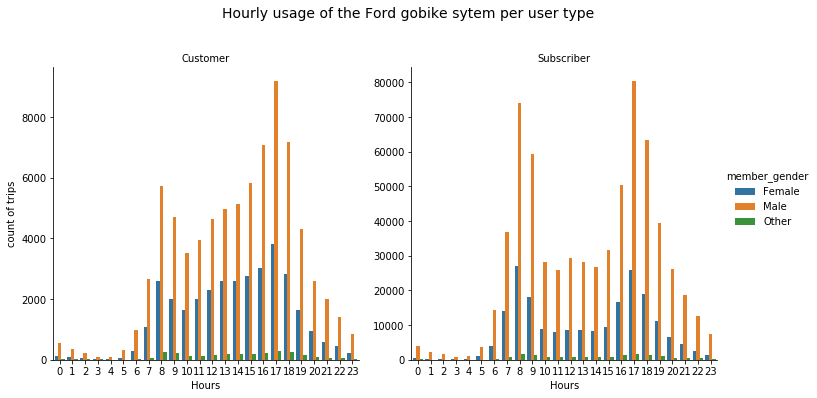

In [90]:
g = sns.catplot(data=fordgobike_2019_clean, x='start_hour', col="user_type", hue="member_gender" , kind='count',sharey = False  )
g.set_axis_labels('Hours', 'count of trips')
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the Ford gobike sytem per user type and gender ',y=1.10 ,fontsize=14);

#### The chart shows that the peak hour for customers are around 5 pm and subscribers between 8am and 5pm and usied mostly by males .

### -What are the rang of age for the Ford gobike system riders per user type and gender?

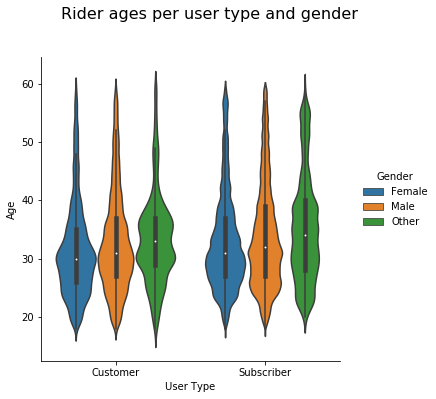

In [112]:
data = fordgobike_2019_clean.query('member_age < 60')
g = sb.catplot(data= data, x='user_type', y='member_age' , hue='member_gender' , kind='violin' );
g.set_axis_labels("User type", "Age")
g._legend.set_title('Gender')
g.fig.suptitle('Rider ages per user type and gender', y=1.10, fontsize=16);

#### The average age of all user type and genders is between the age 20-40.

### -What  is the averag trip duration per usertype and gender ?

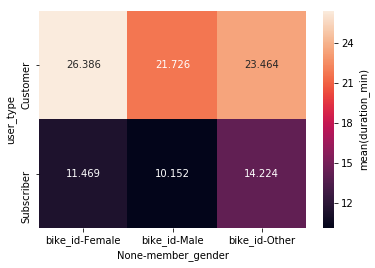

In [104]:
means =fordgobike_2019_clean.groupby(['user_type', 'member_gender']).mean()['duration_min']
means = means.reset_index(name = 'bike_id')
means = means.pivot(index = 'user_type', columns = 'member_gender',)
sb.heatmap(means, annot = True, fmt = '.3f',cbar_kws = {'label' : 'mean(duration_min)'});


#### From the heatmap ,shows that both genders take the same trip duration there are no big difference in for the subscribers and for the customer there's is a little different by 5 minutes between genders .

# Conclusion

### From all kind of ploting , we got that the Ford gobike sytem works from San Francisco to rint bikes for two types of clients using the system: Subscribers and Customers.
The behavef of user types : 
<li> - Subscribers are the main users :</li> 
Most bike rides are around the peak hours 8-9am and 5-6pm ,mostly rent in march and the most gender are the adult males there age around 20-40
<li>-Customers are usually tourists ,not often use the system : </li> 
Mostly they uesd ths system around 8-9am and 5-6pm ,in march and the most are also adult males there age around 20-40.
    

### References

https://www.lyft.com/bikes/bay-wheels/system-data

https://seaborn.pydata.org/generated/seaborn.catplot.html

https://seaborn.pydata.org/tutorial/categorical.html

https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.hist.html

https://stackoverflow.com/questions/44118395/python-pandas-convert-seconds-to-time-hhmm